In [1]:
import numpy as np
import json
from collections import Counter
from hazm import Normalizer, word_tokenize

In [2]:
with open('../data/cs_stack.json') as f:
    data = json.load(f)

In [7]:
def normalizer_text(text):
    normalizer = Normalizer()
    return normalizer.normalize(text)

In [8]:
with open('persian_stop_words.txt') as f:
    stop_words = []
    for sw in f:
        stop_words.append(sw)
stop_words = list(map(str.strip, stop_words))
stop_words = list(map(normalizer_text, stop_words))

In [9]:
def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = filter(lambda word: word not in stop_words, tokens)
    return " ".join(tokens)

In [11]:
data_text = []
for msg in data['messages']:
    if isinstance(msg['text'], str):
        msg_normal = normalizer_text(msg['text'])
        data_text.append(remove_stopwords(msg_normal))
    elif isinstance(msg['text'][0], str):
        msg_normal = normalizer_text(msg['text'][0])
        data_text.append(remove_stopwords(msg_normal))

> <i> All objects in `data_text` must be string

In [12]:
len(data_text) == sum([isinstance(msg, str) for msg in data_text])

True

> <i>In next step we will tokenize words.

In [13]:
data_text_all = " ".join(data_text)

In [14]:
Counter(data_text_all.split()).most_common(10)

[('.', 6403),
 ('؟', 3027),
 ('،', 1841),
 (')', 1763),
 ('سلام', 1509),
 ('نصب', 1471),
 (':', 1048),
 ('دوستان', 1042),
 ('(', 954),
 ('ممنون', 782)]

> <i>Above method is not a good aproch for tokenizing persian words.

In [15]:
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

In [17]:
text = arabic_reshaper.reshape(data_text_all)
# text = get_display(text)

In [24]:
wc = WordCloud( width=600, height=300, font_path='/mnt/c/fonts/fonts/Iransans/Iransans.ttf',  background_color='white').generate(text)

(-0.5, 599.5, 299.5, -0.5)

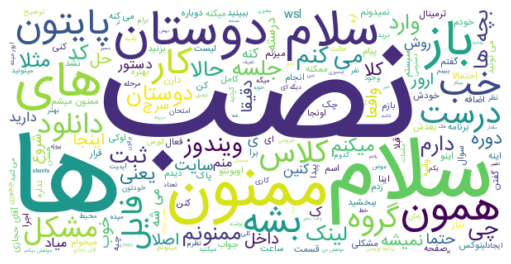

In [28]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [ ]:
str.strip()